In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('./Game.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 21 columns):
Gm#                162 non-null int64
Date               162 non-null object
Unnamed: 2         162 non-null object
Tm                 162 non-null object
Unnamed: 4         81 non-null object
Opp                162 non-null object
W/L                162 non-null object
R                  162 non-null int64
RA                 162 non-null int64
Inn                17 non-null float64
W-L                162 non-null object
Rank               162 non-null int64
GB                 162 non-null float64
Win                162 non-null object
Loss               162 non-null object
Save               84 non-null object
Time               162 non-null object
D/N                162 non-null object
Attendance         160 non-null float64
Streak             162 non-null object
Orig. Scheduled    0 non-null float64
dtypes: float64(4), int64(4), object(13)
memory usage: 26.7+ KB


In [4]:
#Inspecting the Null values
df.isnull().sum(axis=0)

Gm#                  0
Date                 0
Unnamed: 2           0
Tm                   0
Unnamed: 4          81
Opp                  0
W/L                  0
R                    0
RA                   0
Inn                145
W-L                  0
Rank                 0
GB                   0
Win                  0
Loss                 0
Save                78
Time                 0
D/N                  0
Attendance           2
Streak               0
Orig. Scheduled    162
dtype: int64

In [5]:
df.head(10)

,Gm#,Date,Unnamed: 2,Tm,Unnamed: 4,Opp,W/L,R,RA,Inn,...,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled
0,1,Thursday Mar 29,boxscore,TOR,NaN,NYY,L,1,6,NaN,...,4,1.0,Severino,Happ,NaN,2:51,D,48115.0,-,NaN
1,2,Friday Mar 30,boxscore,TOR,NaN,NYY,L,2,4,NaN,...,5,2.0,Tanaka,Sanchez,Chapman,2:49,N,33716.0,--,NaN
2,3,Saturday Mar 31,boxscore,TOR,NaN,NYY,W,5,3,NaN,...,4,1.0,Tepera,Betances,Osuna,2:37,D,37692.0,+,NaN
3,4,Sunday Apr 1,boxscore,TOR,NaN,NYY,W,7,4,NaN,...,2,1.0,Clippard,Robertson,Oh,3:03,D,29091.0,++,NaN
4,5,Monday Apr 2,boxscore,TOR,NaN,CHW,W,4,2,NaN,...,2,1.0,Oh,Farquhar,Osuna,2:51,N,16629.0,+++,NaN
5,6,Tuesday Apr 3,boxscore,TOR,NaN,CHW,W,14,5,NaN,...,2,1.0,Happ,Gonzalez,NaN,3:27,N,17451.0,++++,NaN
6,7,Wednesday Apr 4,boxscore,TOR,NaN,CHW,L,3,4,NaN,...,3,1.5,Jones,Tepera,Soria,2:56,N,17268.0,-,NaN
7,8,Friday Apr 6,boxscore,TOR,@,TEX,W,8,5,NaN,...,2,1.5,Estrada,Moore,Osuna,3:06,N,21670.0,+,NaN
8,9,Saturday Apr 7,boxscore,TOR,@,TEX,L,1,5,NaN,...,2,2.5,Minor,Stroman,NaN,2:37,N,26229.0,-,NaN
9,10,Sunday Apr 8,boxscore,TOR,@,TEX,W,7,4,NaN,...,2,2.5,Garcia,Hamels,Osuna,3:16,D,26902.0,+,NaN


In [6]:
df = df.drop('Unnamed: 2', 1)
df = df.drop('Orig. Scheduled', 1)
df = df.drop('Tm', 1)
df.head(1)

,Gm#,Date,Unnamed: 4,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak
0,1,Thursday Mar 29,NaN,NYY,L,1,6,NaN,0-1,4,1.0,Severino,Happ,NaN,2:51,D,48115.0,-


In [7]:
df['home']=df['Unnamed: 4']
df = df.drop('Unnamed: 4', 1)

In [8]:
df['home']=df['home'].fillna('Y')
df['home']=df['home'].str.replace('@','N')
df['Inn']=df['Inn'].fillna(9)
df['Save']=df['Save'].fillna('X')
df.head(3)

,Gm#,Date,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,home
0,1,Thursday Mar 29,NYY,L,1,6,9.0,0-1,4,1.0,Severino,Happ,X,2:51,D,48115.0,-,Y
1,2,Friday Mar 30,NYY,L,2,4,9.0,0-2,5,2.0,Tanaka,Sanchez,Chapman,2:49,N,33716.0,--,Y
2,3,Saturday Mar 31,NYY,W,5,3,9.0,1-2,4,1.0,Tepera,Betances,Osuna,2:37,D,37692.0,+,Y


In [9]:
df['Attendance'].fillna((df['Attendance'].mean()), inplace=True)

In [10]:
#데이터 프레임에서 문자열 자르기

df['Day']=df['Date'].apply(lambda e: e.split()[0])
df['Mon']=df['Date'].apply(lambda e: e.split()[1])

df.head(3)

,Gm#,Date,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,home,Day,Mon
0,1,Thursday Mar 29,NYY,L,1,6,9.0,0-1,4,1.0,Severino,Happ,X,2:51,D,48115.0,-,Y,Thursday,Mar
1,2,Friday Mar 30,NYY,L,2,4,9.0,0-2,5,2.0,Tanaka,Sanchez,Chapman,2:49,N,33716.0,--,Y,Friday,Mar
2,3,Saturday Mar 31,NYY,W,5,3,9.0,1-2,4,1.0,Tepera,Betances,Osuna,2:37,D,37692.0,+,Y,Saturday,Mar


In [11]:
df['W-L']=df['W-L'].str.replace('-',' ')

In [12]:
win=df['W-L'].apply(lambda e: e.split()[0]).astype(str).astype(int)
lose=df['W-L'].apply(lambda e: e.split()[1]).astype(str).astype(int)

In [13]:
df['WinRate']=round((win/(win+lose))*100,1)

In [14]:
df['WinP']=win-lose

In [15]:
df.head(5)

,Gm#,Date,Opp,W/L,R,RA,Inn,W-L,Rank,GB,...,Save,Time,D/N,Attendance,Streak,home,Day,Mon,WinRate,WinP
0,1,Thursday Mar 29,NYY,L,1,6,9.0,0 1,4,1.0,...,X,2:51,D,48115.0,-,Y,Thursday,Mar,0.0,-1
1,2,Friday Mar 30,NYY,L,2,4,9.0,0 2,5,2.0,...,Chapman,2:49,N,33716.0,--,Y,Friday,Mar,0.0,-2
2,3,Saturday Mar 31,NYY,W,5,3,9.0,1 2,4,1.0,...,Osuna,2:37,D,37692.0,+,Y,Saturday,Mar,33.3,-1
3,4,Sunday Apr 1,NYY,W,7,4,9.0,2 2,2,1.0,...,Oh,3:03,D,29091.0,++,Y,Sunday,Apr,50.0,0
4,5,Monday Apr 2,CHW,W,4,2,9.0,3 2,2,1.0,...,Osuna,2:51,N,16629.0,+++,Y,Monday,Apr,60.0,1


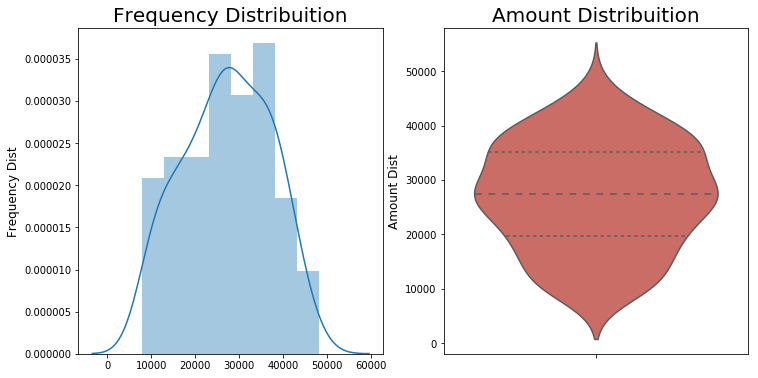

In [16]:
plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.distplot(df["Attendance"])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(y="Attendance", data=df, 
               inner="quartile", palette="hls")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Amount Dist", fontsize=12)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

#While the histogram method creates discontinuities by increasing the value of bin corresponding to each data in discrete, the KDE (Kernel Density Estimation) method adds each data as a function of the kernel, showing a smooth probability density function (pdf) as shown in the graph.

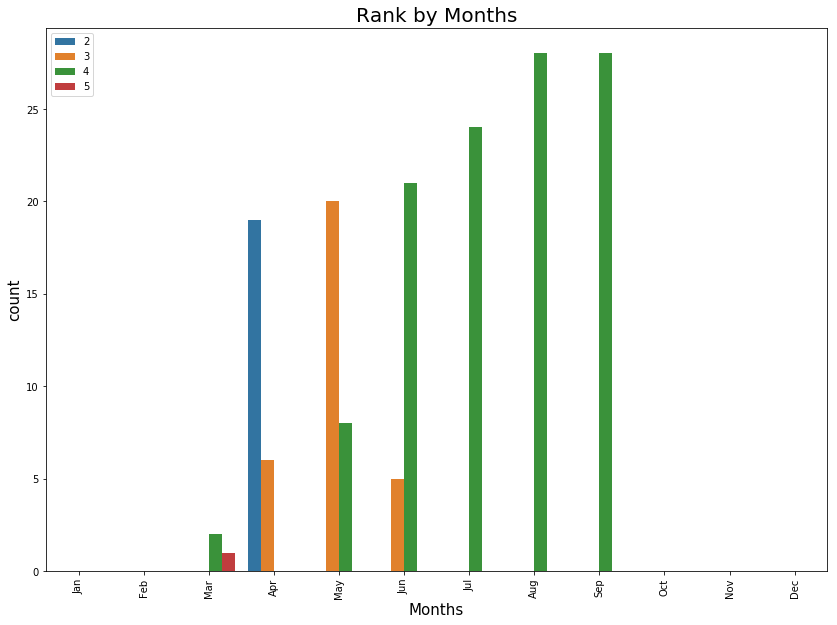

In [17]:
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df['Mon'] = pd.Categorical(df['Mon'],categories=months_order, ordered=True)


plt.figure(figsize = (14,10))

g = sns.countplot(x='Mon', 
                  data=df, 
                  hue='Rank')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Rank by Months", fontsize=20)
plt.show()

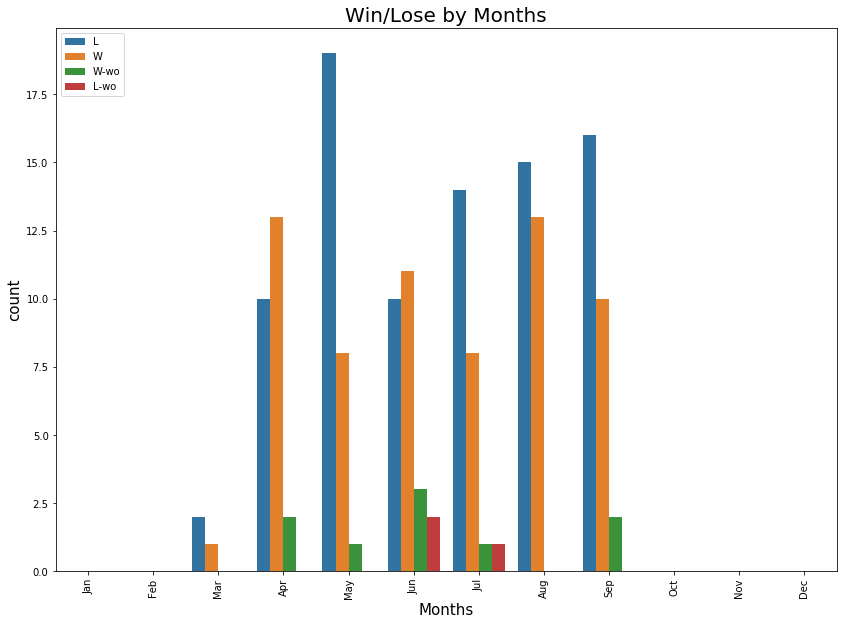

In [18]:
# months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
# df['Mon'] = pd.Categorical(df['Mon'],categories=months_order, ordered=True)


plt.figure(figsize = (14,10))

g = sns.countplot(x='Mon', 
                  data=df, 
                  hue='W/L')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Win/Lose by Months", fontsize=20)
plt.show()

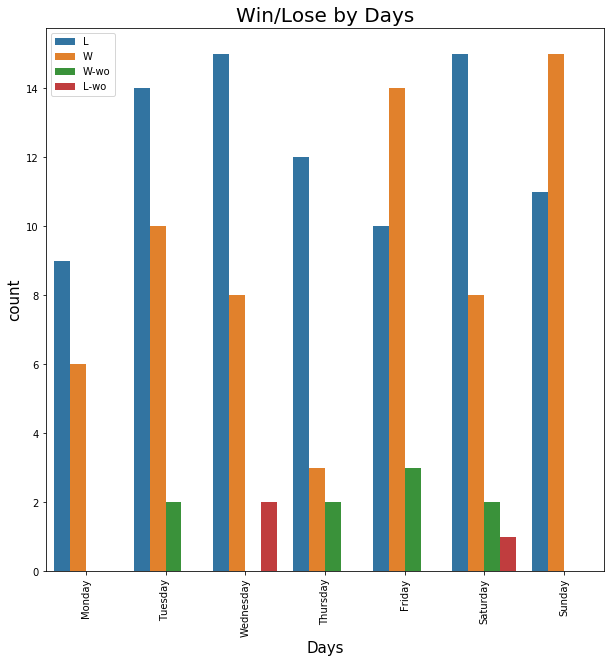

In [19]:
Days_order = ["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"]
df['Day'] = pd.Categorical(df['Day'],categories=Days_order, ordered=True)


plt.figure(figsize = (10,10))

g = sns.countplot(x='Day', 
                  data=df, 
                  hue='W/L')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Days", fontsize=15)
g.set_ylabel("count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Win/Lose by Days", fontsize=20)
plt.show()

In [20]:
# walkoff win,lose 를 win,lose에 통합
df['W/L']=df['W/L'].str.replace('W-wo','W')
df['W/L']=df['W/L'].str.replace('L-wo','L')

In [28]:
#상대팀별로 승패보기
df[['W/L']].groupby(df['Opp']).describe()

W/L                
    count unique top freq
Opp                      
ATL     4      2   W    2
BAL    19      2   W   14
BOS    19      2   L   15
CHW     6      2   W    4
CLE     7      2   W    4
DET     7      2   L    4
HOU     6      2   L    4
KCR     7      2   W    5
LAA     7      2   L    4
MIA     3      2   W    2
MIN     6      2   L    4
NYM     4      2   W    2
NYY    19      2   L   13
OAK     7      1   L    7
PHI     6      2   W    4
SEA     7      2   W    4
TBR    19      2   L   13
TEX     6      2   L    3
WSN     3      1   W    3

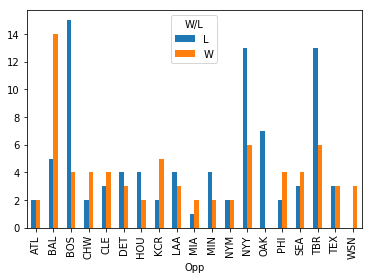

In [30]:
pd.crosstab(df['Opp'],df['W/L']).plot.bar()

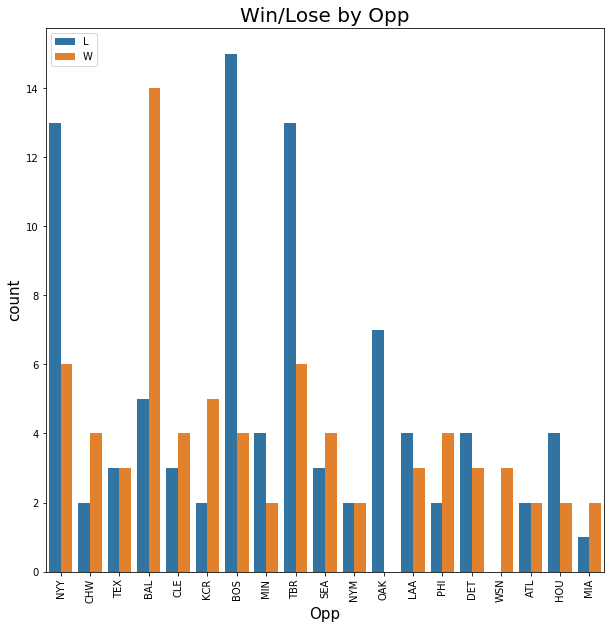

In [22]:

plt.figure(figsize = (10,10))

g = sns.countplot(x='Opp', 
                  data=df, 
                  hue='W/L')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Opp", fontsize=15)
g.set_ylabel("count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Win/Lose by Opp", fontsize=20)
plt.show()

In [23]:
#득실차 변수 만듬
df['Sd']=df.R-df.RA
df.head()

,Gm#,Date,Opp,W/L,R,RA,Inn,W-L,Rank,GB,...,Time,D/N,Attendance,Streak,home,Day,Mon,WinRate,WinP,Sd
0,1,Thursday Mar 29,NYY,L,1,6,9.0,0 1,4,1.0,...,2:51,D,48115.0,-,Y,Thursday,Mar,0.0,-1,-5
1,2,Friday Mar 30,NYY,L,2,4,9.0,0 2,5,2.0,...,2:49,N,33716.0,--,Y,Friday,Mar,0.0,-2,-2
2,3,Saturday Mar 31,NYY,W,5,3,9.0,1 2,4,1.0,...,2:37,D,37692.0,+,Y,Saturday,Mar,33.3,-1,2
3,4,Sunday Apr 1,NYY,W,7,4,9.0,2 2,2,1.0,...,3:03,D,29091.0,++,Y,Sunday,Apr,50.0,0,3
4,5,Monday Apr 2,CHW,W,4,2,9.0,3 2,2,1.0,...,2:51,N,16629.0,+++,Y,Monday,Apr,60.0,1,2


In [31]:
#득실차에 따른 경기수보기
df[['W/L']].groupby(df['Sd']).describe()

W/L                
    count unique top freq
Sd                       
-11     1      1   L    1
-10     1      1   L    1
-9      2      1   L    2
-8      4      1   L    4
-7      7      1   L    7
-6      3      1   L    3
-5     16      1   L   16
-4     11      1   L   11
-3     15      1   L   15
-2     12      1   L   12
-1     17      1   L   17
 1     23      1   W   23
 2     15      1   W   15
 3     12      1   W   12
 4      8      1   W    8
 5      5      1   W    5
 6      4      1   W    4
 7      1      1   W    1
 8      1      1   W    1
 9      1      1   W    1
 10     2      1   W    2
 11     1      1   W    1

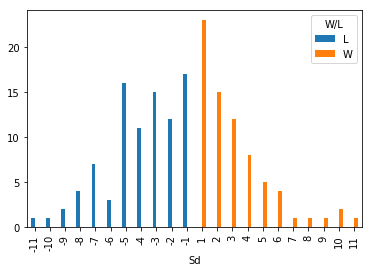

In [34]:
pd.crosstab(df['Sd'],df['W/L']).plot.bar()

In [24]:
# 승패에 따른 득실차를 보기
df[['Sd']].groupby(df['W/L']).describe()

Sd                                               
    count      mean       std   min  25%  50%  75%   max
W/L                                                     
L    89.0 -3.910112  2.396211 -11.0 -5.0 -4.0 -2.0  -1.0
W    73.0  3.082192  2.384868   1.0  1.0  2.0  4.0  11.0

In [25]:
df[['home']].groupby(df['W/L']).describe()

home                
    count unique top freq
W/L                      
L      89      2   N   48
W      73      2   Y   40

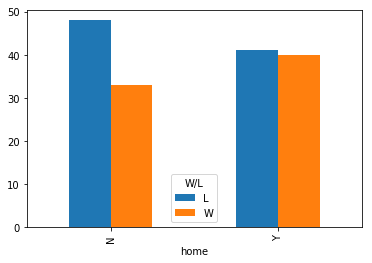

In [36]:
pd.crosstab(df['home'],df['W/L']).plot.bar()

In [26]:
df[['W/L']].groupby(df['home']).describe()

W/L                
     count unique top freq
home                      
N       81      2   L   48
Y       81      2   L   41

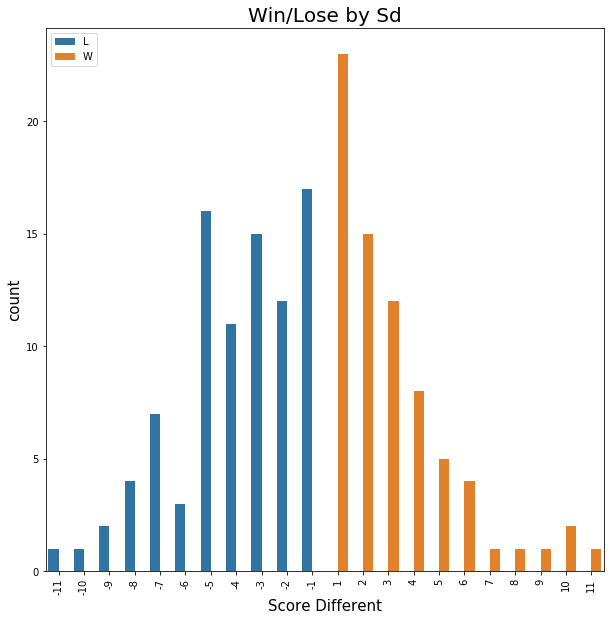

In [27]:

plt.figure(figsize = (10,10))

g = sns.countplot(x='Sd', 
                  data=df, 
                  hue='W/L')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Score Different", fontsize=15)
g.set_ylabel("count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Win/Lose by Sd", fontsize=20)
plt.show()

In [28]:
narrow_win = [1, 2] 
narrow_lose= [-1 , -2]          
great_win = [3,4,5,6,7,8,9,10,11]

df['WL_condition'] = np.nan

def WL_condition(status):
    if status in narrow_win:
        return 'narrow win'
    elif status in narrow_lose:
        return 'narrow lose'
    elif status in great_win:
        return 'great win'
    else:
        return 'heavy defeat'
    
    
df['WL_condition'] = df['Sd'].apply(WL_condition)

In [29]:
# narrow_win = [1, 2] 
# narrow_lose= [-1 , -2]          


# df['WL_condition'] = np.nan

# def WL_condition(status):
#     if status in narrow_win:
#         return 'narrow win'
#     elif status in narrow_lose:
#         return 'narrow lose'
#     else:
#         return 'others'
    
    
# df['WL_condition'] = df['Sd'].apply(WL_condition)

In [30]:
df['WL_condition'].value_counts()

heavy defeat    60
narrow win      38
great win       35
narrow lose     29
Name: WL_condition, dtype: int64

In [31]:
# f, ax = plt.subplots(1,2, figsize=(18,8))

# colors = ["#3ebfe2","#3791D7","#D72626" ]
# labels = ["others","narrow win", "narrow lose"]

# plt.suptitle('Information on Game Score Result', fontsize=18)

# df["WL_condition"].value_counts().plot.pie(explode=[0,0,0.2], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
#                                              labels=labels, fontsize=10, startangle=20)


# # ax[0].set_title('State of Loan', fontsize=16)
# ax[0].set_ylabel('% of Condition of Score Result', fontsize=10)

# # sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# # ax[1].set_title('Condition of Loans', fontsize=20)
# # ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
# palette = ["#3791D7","#D72626","#3ebfe2"]

# sns.barplot(x=df['Mon'], y=df['W-L'], hue="WL_condition", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
# ax[1].set(ylabel="(%)")

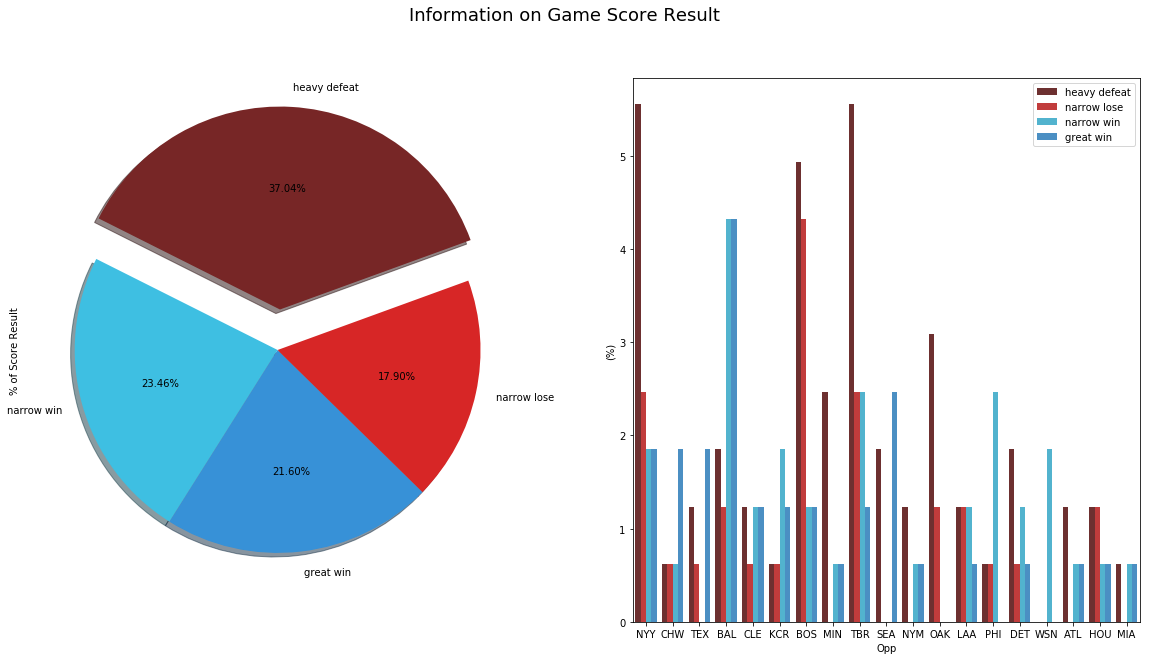

In [32]:
f, ax = plt.subplots(1,2, figsize=(20,10))

colors = ["#772626","#3ebfe2","#3791D7","#D72626"]
labels = ["heavy defeat", "narrow win","great win","narrow lose"]

plt.suptitle('Information on Game Score Result', fontsize=18)

df["WL_condition"].value_counts().plot.pie(explode=[0.2,0,0,0], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=10, startangle=20)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Score Result', fontsize=10)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#772626","#D72626","#3ebfe2", "#3791D7"]

sns.barplot(x=df['Opp'], y=df['Rank'], hue="WL_condition", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
plt.legend(loc='upper right')


In [33]:
import plotly.offline as py 
import plotly.figure_factory as ff 
import plotly.graph_objs as go 
from plotly import tools 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
py.init_notebook_mode(connected= True)


data = []
for i in df["WL_condition"].unique():
    data.append(go.Box(y = df[df["WL_condition"]==i]["Attendance"], name = i))
    
layout = go.Layout(title = 'Number of Attendance based on Score Result', 
                   xaxis = dict(title = 'Score Result'), 
                   yaxis = dict(title = 'Number of Attendance'))
fig = dict(data = data, layout = layout)
py.iplot(fig)

In [34]:
import plotly.offline as py 
import plotly.figure_factory as ff 
import plotly.graph_objs as go 
from plotly import tools 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
py.init_notebook_mode(connected= True)


data = []
for i in df["Opp"].unique():
    data.append(go.Box(y = df[df["Opp"]==i]["Attendance"], name = i))
    
layout = go.Layout(title = 'Number of Attendance based on opposite Team', 
                   xaxis = dict(title = 'opposite Team'), 
                   yaxis = dict(title = 'Number of Attendance'))
fig = dict(data = data, layout = layout)
py.iplot(fig)

In [35]:
import plotly.offline as py 
import plotly.figure_factory as ff 
import plotly.graph_objs as go 
from plotly import tools 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
py.init_notebook_mode(connected= True)


data = []
for i in df["home"].unique():
    data.append(go.Box(y = df[df["home"]==i]["Attendance"], name = i))
    
layout = go.Layout(title = 'Number of Attendance based on home or away game', 
                   xaxis = dict(title = 'home game'), 
                   yaxis = dict(title = 'Number of Attendance'))
fig = dict(data = data, layout = layout)
py.iplot(fig)

In [36]:
import plotly.offline as py 
import plotly.figure_factory as ff 
import plotly.graph_objs as go 
from plotly import tools 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
py.init_notebook_mode(connected= True)


data = []
for i in df["Mon"].unique():
    data.append(go.Box(y = df[df["Mon"]==i]["WinRate"], name = i))
    
layout = go.Layout(title = 'Win Rate based on Months', 
                   xaxis = dict(title = 'Months'), 
                   yaxis = dict(title = 'Win Rate'))
fig = dict(data = data, layout = layout)
py.iplot(fig)

In [37]:
import plotly.offline as py 
import plotly.figure_factory as ff 
import plotly.graph_objs as go 
from plotly import tools 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
py.init_notebook_mode(connected= True)


data = []
for i in df["Day"].unique():
    data.append(go.Box(y = df[df["Day"]==i]["WinRate"], name = i))
    
layout = go.Layout(title = 'Win Rate based on Days', 
                   xaxis = dict(title = 'Days'), 
                   yaxis = dict(title = 'Win Rate'))
fig = dict(data = data, layout = layout)
py.iplot(fig)

In [38]:
import plotly.offline as py 
import plotly.figure_factory as ff 
import plotly.graph_objs as go 
from plotly import tools 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
py.init_notebook_mode(connected= True)


data = []
for i in df["home"].unique():
    data.append(go.Box(y = df[df["home"]==i]["WinRate"], name = i))
    
layout = go.Layout(title = 'Win Rate based on Home or Away', 
                   xaxis = dict(title = 'Home or Away'), 
                   yaxis = dict(title = 'Win Rate'))
fig = dict(data = data, layout = layout)
py.iplot(fig)

Text(0, 0.5, 'Attendance')

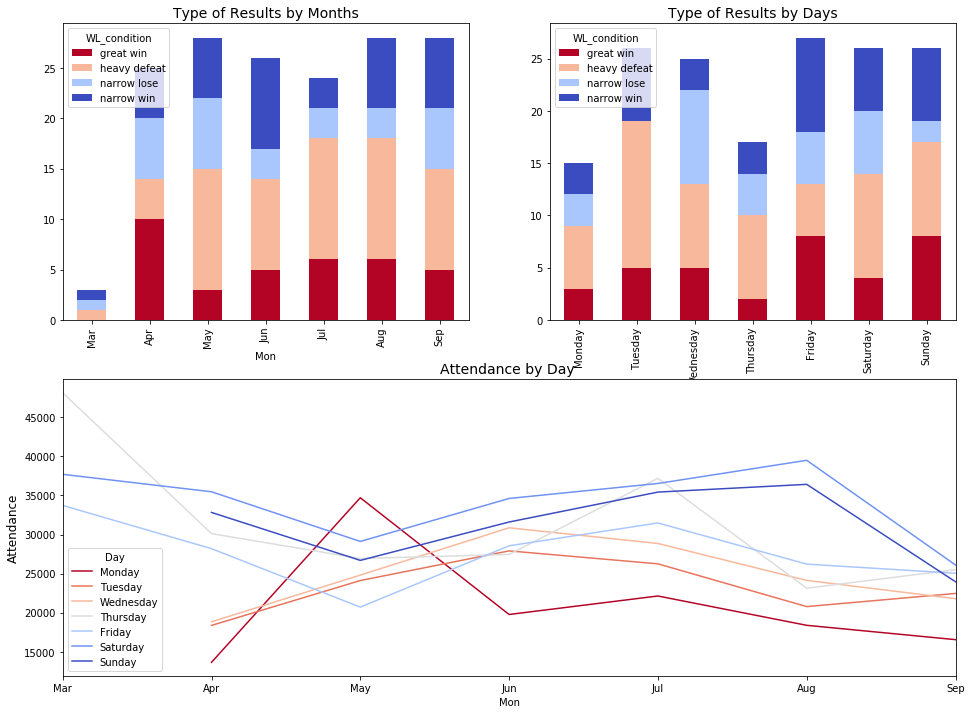

In [39]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_region = df.groupby(['Mon', 'WL_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Results by Months', fontsize=14)


loans_by_grade = df.groupby(['Day', 'WL_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Results by Days', fontsize=14)

by_interest = df.groupby(['Mon', 'Day']).Attendance.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Attendance by Day ', fontsize=14)
ax3.set_ylabel('Attendance', fontsize=12)

Text(0, 0.5, 'WinRate')

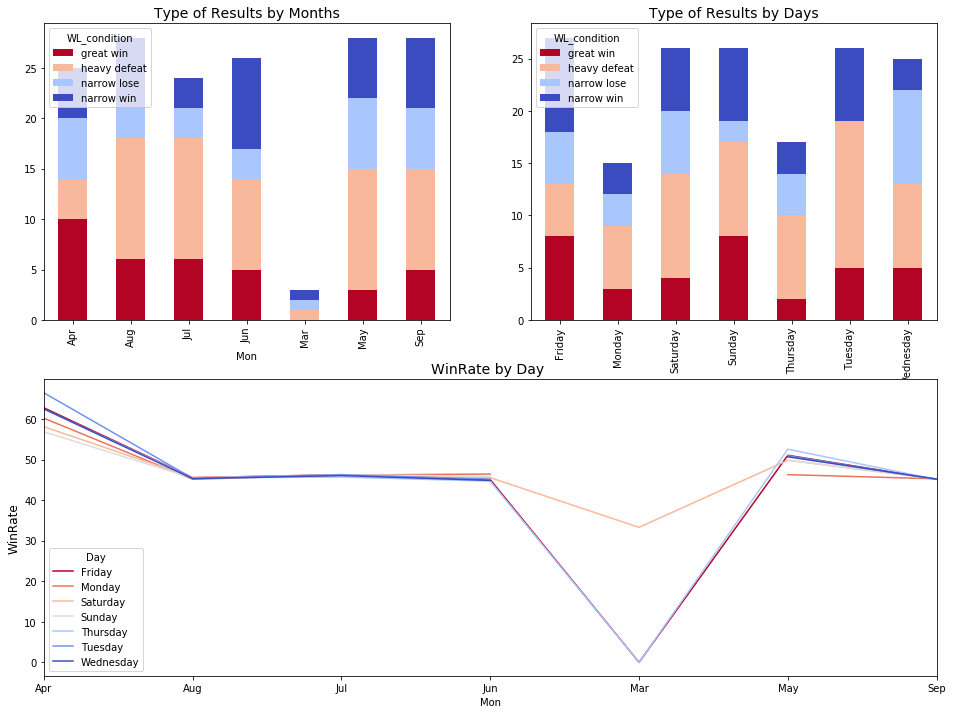

In [61]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_region = df.groupby(['Mon', 'WL_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Results by Months', fontsize=14)


loans_by_grade = df.groupby(['Day', 'WL_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Results by Days', fontsize=14)

by_interest = df.groupby(['Mon', 'Day']).WinRate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('WinRate by Day ', fontsize=14)
ax3.set_ylabel('WinRate', fontsize=12)

In [40]:
#상대팀별로 승패보기
df[['W/L']].groupby(df['Opp']).describe()

W/L                
    count unique top freq
Opp                      
ATL     4      2   W    2
BAL    19      2   W   14
BOS    19      2   L   15
CHW     6      2   W    4
CLE     7      2   W    4
DET     7      2   L    4
HOU     6      2   L    4
KCR     7      2   W    5
LAA     7      2   L    4
MIA     3      2   W    2
MIN     6      2   L    4
NYM     4      2   W    2
NYY    19      2   L   13
OAK     7      1   L    7
PHI     6      2   W    4
SEA     7      2   W    4
TBR    19      2   L   13
TEX     6      2   W    3
WSN     3      1   W    3

In [1]:
#상대팀별로 승률보기
df[['WinRate']].groupby(df['Opp']).describe().plot.bar()

NameError: name 'df' is not defined

In [42]:
df['Mon']=df.Mon.astype('object')
df['Day']=df.Day.astype('object')

In [43]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

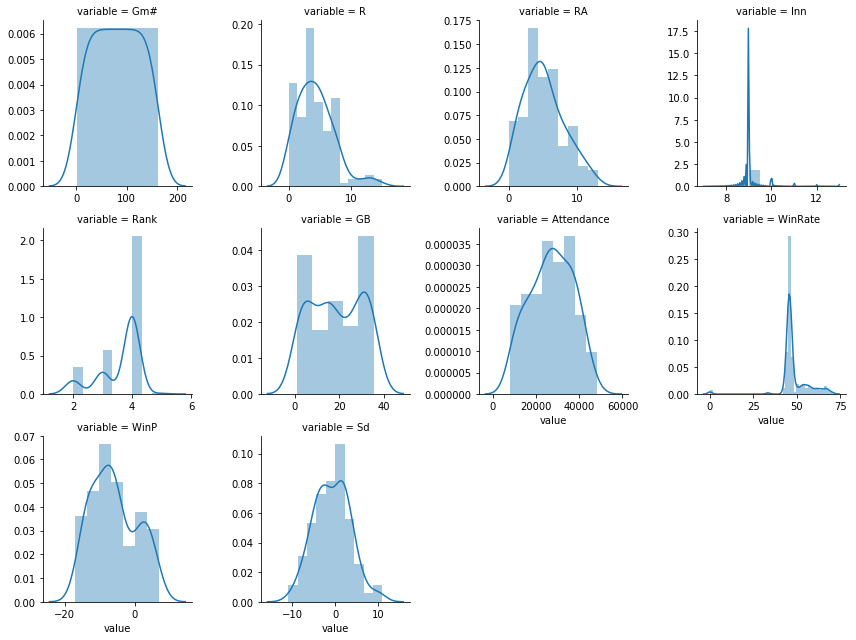

In [44]:
# quantitative data
f = pd.melt(df, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [45]:
for c in qualitative:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['MISSING'])
        df[c] = df[c].fillna('MISSING')

In [46]:
qualitative.remove('Date')
qualitative.remove('W-L')
qualitative.remove('W/L')

C:\Users\dojin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



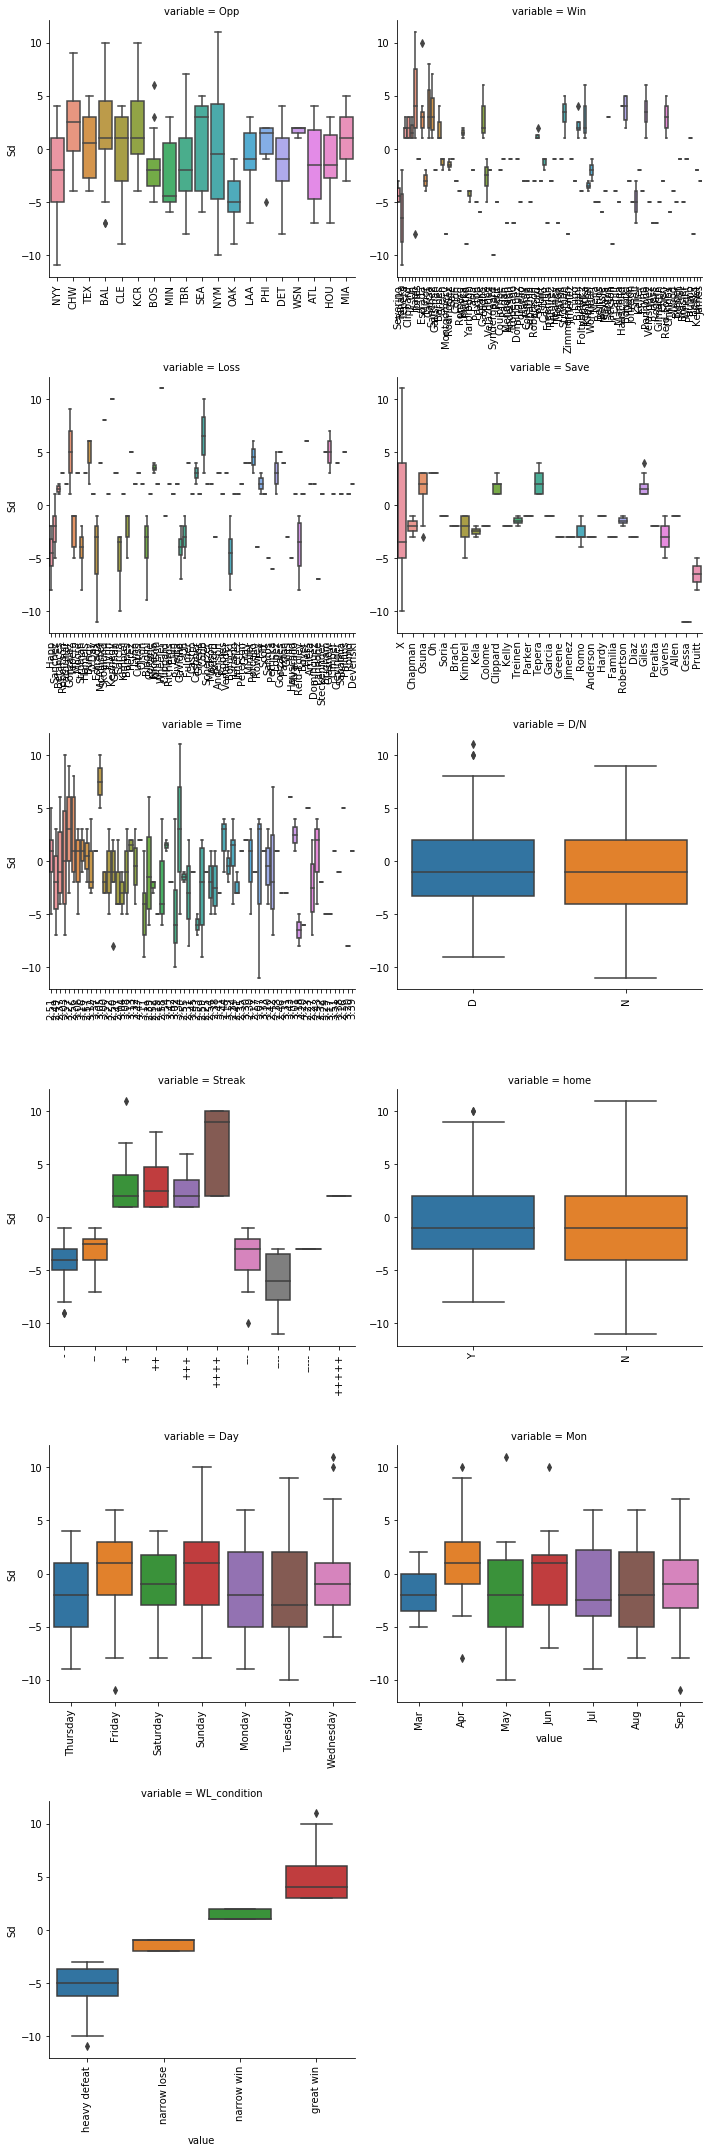

In [47]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['Sd'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "Sd")

In [48]:
# Encording 

from scipy.stats import trim_mean
# m = stats.trim_mean(train[''], 0.1) # Trim 10% at both ends of the mean 극단치 제외하기위해 mean 대신 trim_mean 사용
    
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique() #각 특성의 카테고리값을 val에 넣었다
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'Sd']].groupby(feature)['Sd'].apply(trim_mean, 0.1) #각 특성의 카테고리값의 credit_score 평균을 spmean에 넣는다
    ordering = ordering.sort_values('spmean') # credit_score 평균값이 작은 카테고리부터 sort된다.
    ordering['ordering'] = range(1, ordering.shape[0]+1) # 1부터 카데고리수만큼 순서를 정한후
    ordering = ordering['ordering'].to_dict() #딕셔너리 키밸류 셋으로 만든후
    
    for cat, o in ordering.items(): # 키,밸류 뽑아서
        frame.loc[frame[feature] == cat, feature+'_E'] = o # 카테고리 이름과 변수 이름이 만나는 행렬의 밸류값 즉 credit_score평균값을 꺼낸다.
    
qual_encoded = []
for q in qualitative:  
    encode(df, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['Opp_E', 'Win_E', 'Loss_E', 'Save_E', 'Time_E', 'D/N_E', 'Streak_E', 'home_E', 'Day_E', 'Mon_E', 'WL_condition_E']


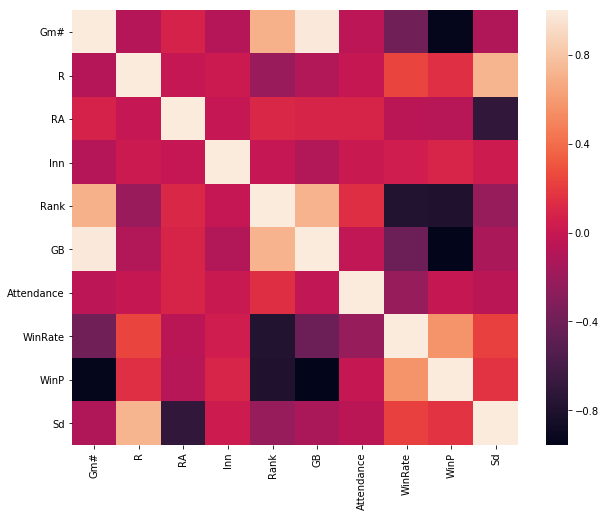

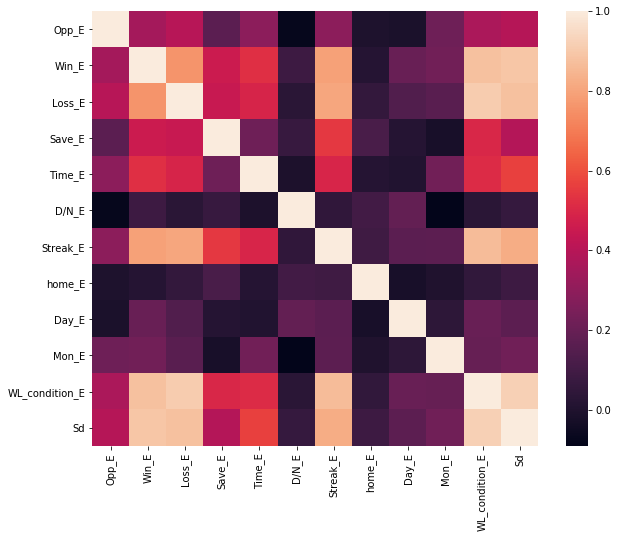

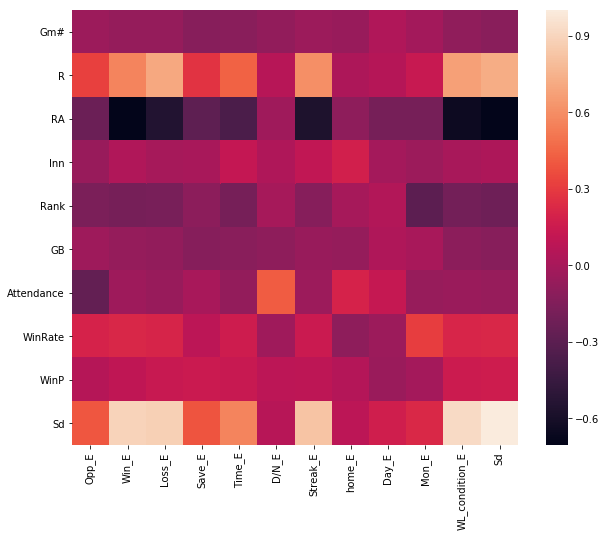

In [49]:
#변수 그룹별 상관관계
#Correlation matrix

plt.figure(figsize=(10, 8)) 
plt.figure(1)
corr = df[quantitative].corr()
sns.heatmap(corr)

plt.figure(figsize=(10, 8))
plt.figure(2)
corr = df[qual_encoded+['Sd']].corr()
sns.heatmap(corr)

plt.figure(figsize=(10, 8))
plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quantitative), len(qual_encoded)+1]), index=quantitative, columns=qual_encoded+['Sd'])
for q1 in quantitative:
    for q2 in qual_encoded+['Sd']:
        corr.loc[q1, q2] = df[q1].corr(df[q2])
sns.heatmap(corr)

In [50]:
quantitative.remove('Sd')
df_E=df[quantitative+qual_encoded]
df_E.head(2)

,Gm#,R,RA,Inn,Rank,GB,Attendance,WinRate,WinP,Opp_E,Win_E,Loss_E,Save_E,Time_E,D/N_E,Streak_E,home_E,Day_E,Mon_E,WL_condition_E
0,1,1,6,9.0,4,1.0,48115.0,0.0,-1,3.0,31.0,7.0,19.0,45.0,2.0,2.0,2.0,1.0,2.0,1.0
1,2,2,4,9.0,5,2.0,33716.0,0.0,-2,3.0,13.0,19.0,15.0,20.0,1.0,5.0,2.0,7.0,2.0,2.0


C:\Users\dojin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



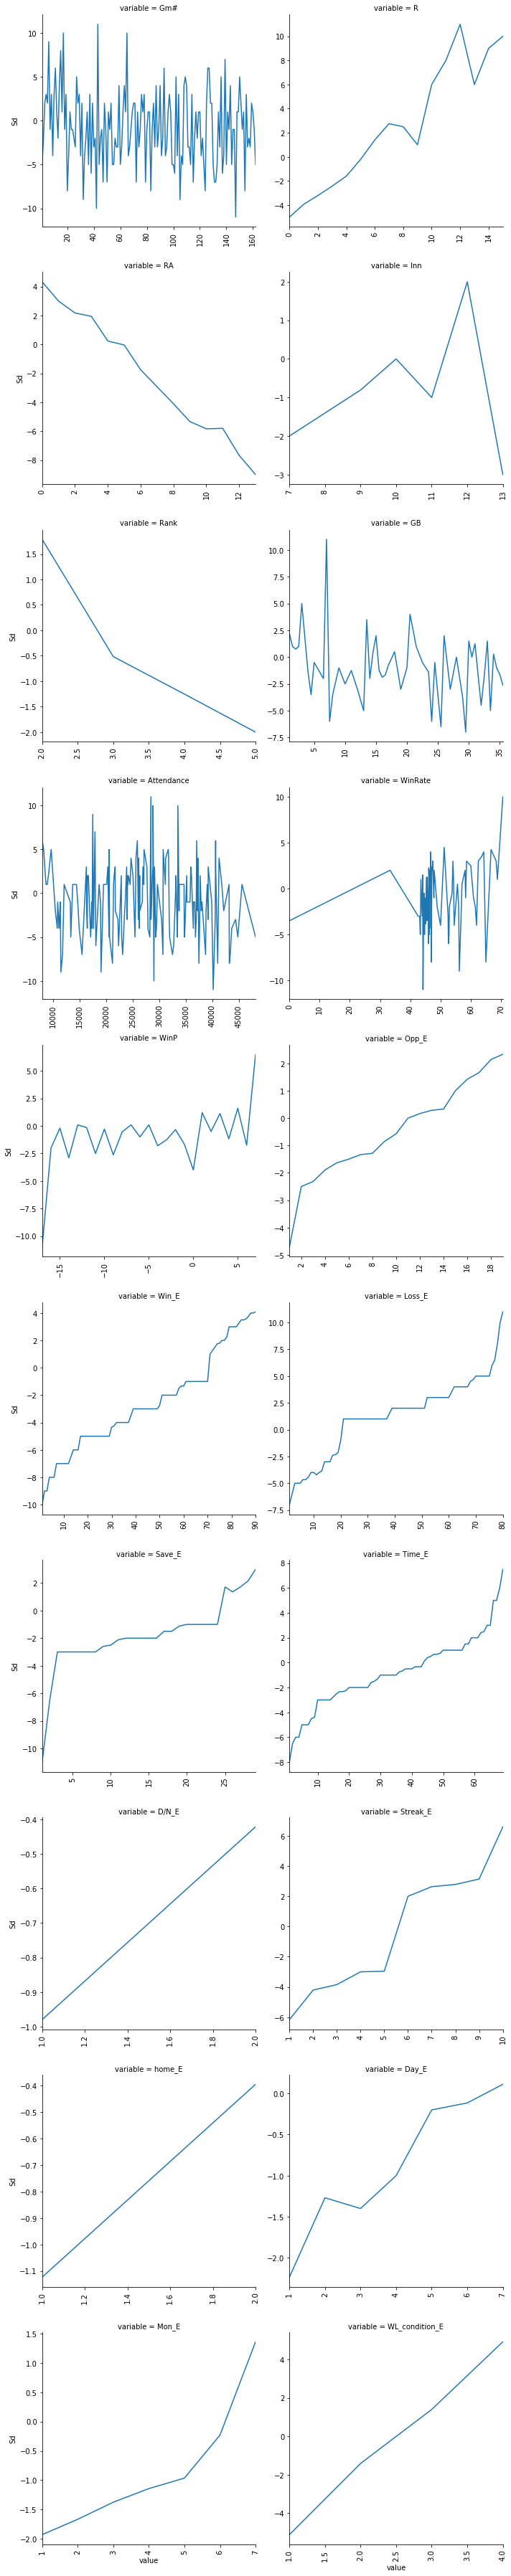

In [52]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(df, id_vars=['Sd'], value_vars=quantitative+qual_encoded)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "Sd")